Ejemplo de un problema de regresión (ajustar una superficie a unos datos).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Se crea un conjunto de datos tipo "blobs" para dos clases diferentes. El conjunto consta de un total de 128 puntos de los cuales el 75% se usaran para construir la superficie y el 25% restante para "probar" que "tan buena" es la predicción.

In [5]:
n_samples = 128
n_bins = 2  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-2, -2), (2, 2)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1,
                  centers=centers, shuffle=False, random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X, y, sample_weight, test_size=0.25, random_state=42)


Visualizamos los datos.  
Se aprecia que en este caso (a diferencia de la función XOR) si es posible encontrar una curva que separe los datos de ambas clases. El problema de regresión entonces puede ser usado para clasificación también.

Text(0.5, 1.0, 'Data')

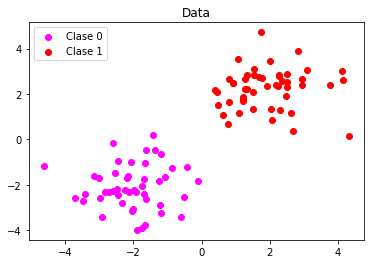

In [6]:
plt.figure()
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]

plt.scatter(X1[:, 0], X1[:, 1], color = 'magenta')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
plt.legend(['Clase 0', 'Clase 1'], loc="best")
plt.title("Data")

Visualizamos los datos en 3D

<IPython.core.display.Javascript object>


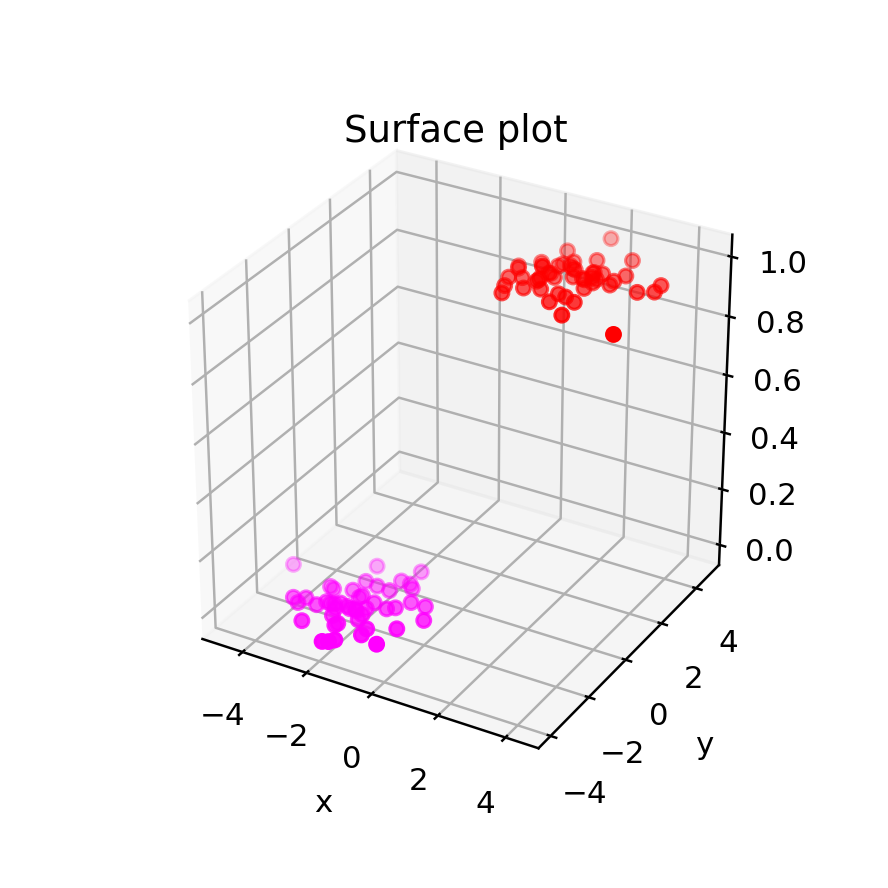

In [10]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X[:,0]
y = X[:,1]

Xm, Ym = np.meshgrid(x, y)

plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

#ax.plot_surface(Xm, Ym, z,cmap='viridis', edgecolor='none')

X1=X_train[y_train == 0]
X2=X_train[y_train == 1]
y1=y_train[y_train == 0]
y2=y_train[y_train == 1]

ax.scatter(X1[:, 0], X1[:, 1], y1, color = 'magenta')
ax.scatter(X2[:, 0], X2[:, 1], y2, color = 'red')
plt.xlabel('x')
plt.ylabel('y')


ax.set_title('Surface plot')
plt.show()

utilizamos mínimos cuadrados para encontrar los parámetros de la superficie que se ajusta a los datos

In [12]:
# assemble matrix A
A = np.vstack([X_train.T**3, (X_train[:,0].T**2)*(X_train[:,1].T), (X_train[:,1].T**2)*(X_train[:,0].T), X_train.T**2, X_train.T, np.ones(len(X_train))]).T

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y_train)
print(alpha)


[-3.92230106e-03  8.42229842e-06 -3.18766511e-04 -1.83241092e-02
  3.10901001e-03  2.99561874e-03  1.84099152e-01  1.76604296e-01
  4.72751788e-01]


Visualizamos la superficie junto con los datos.  
Pueden rotar la superficie en la Figura usando el mouse

<IPython.core.display.Javascript object>


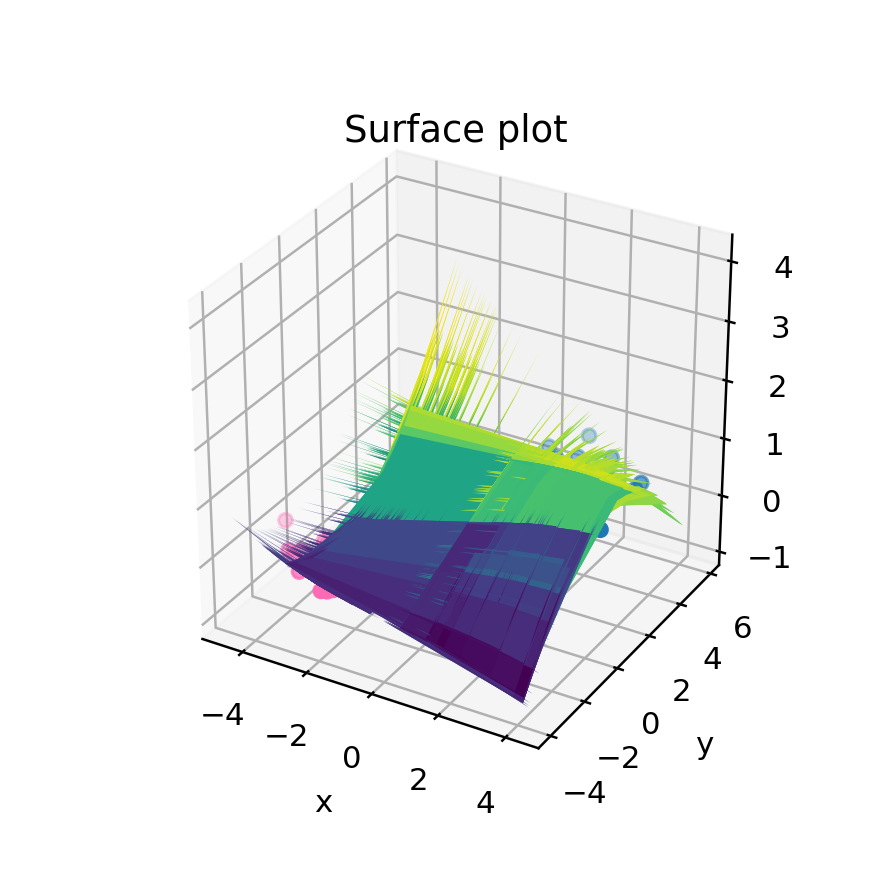

In [14]:
%matplotlib notebook

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X[:,0]
y = X[:,1]

Xm, Ym = np.meshgrid(x, y)
z = alpha[0]*Xm**3 + alpha[1]*Ym**3 +  alpha[2]*(Xm**2)*Ym + alpha[3]*(Ym**2)*Xm + \
alpha[4]*Xm**2 + alpha[4]*Ym**2 + alpha[6]*Xm + alpha[7]*Ym + alpha[8]

plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

ax.plot_surface(Xm, Ym, z,cmap='viridis', edgecolor='none')


X1=X_train[y_train == 0]
X2=X_train[y_train == 1]
y1=y_train[y_train == 0]
y2=y_train[y_train == 1]

ax.scatter(X1[:, 0], X1[:, 1], y1, color = 'hotpink')
ax.scatter(X2[:, 0], X2[:, 1], y2)

plt.xlabel('x')
plt.ylabel('y')


ax.set_title('Surface plot')
plt.show()

Visualizamos la curva de nivel de la superficie que separa los datos en 2D

<IPython.core.display.Javascript object>


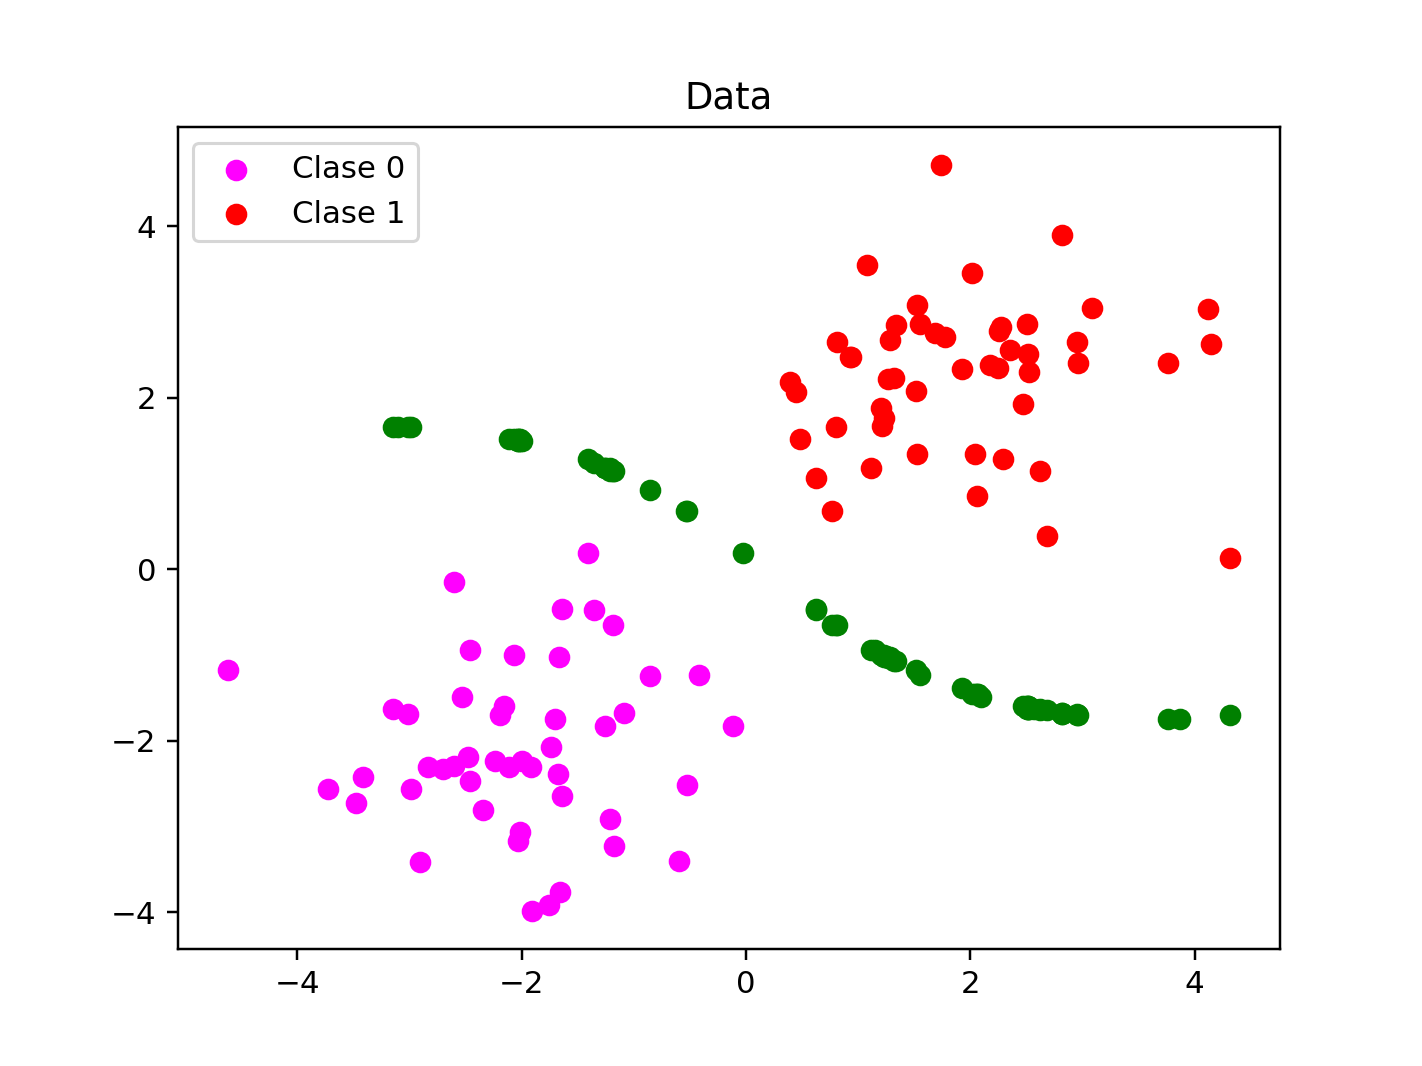

Text(0.5, 1.0, 'Data')

In [15]:
Xmz = Xm[np.where((z < 0.505) & (z > 0.495))]
Ymz = Ym[np.where((z < 0.505) & (z > 0.495))]

plt.figure()
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]

plt.scatter(X1[:, 0], X1[:, 1], color = 'magenta')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
plt.scatter(Xmz, Ymz, color = 'green')
plt.legend(['Clase 0', 'Clase 1'], loc="best")
plt.title("Data")